In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
def laplacian_g(x, y, sigma):
    x2 = x**2
    y2 = y**2
    sigma4 = sigma**4
    sigma2 = sigma**2

    return -1*(1/(np.pi*sigma4))*(1-((x2+y2)/(2*sigma2)))*np.exp(-1*(x2+y2)/(2*sigma2))

In [3]:
def filterImg(img, fil):
    fil = fil.astype('float')    
    img = img.astype('float')
    # this holds the end result
    filtered = np.zeros_like(img)
    width = int((fil.shape[1]-1)/2)
    height = int((fil.shape[0]-1)/2)
    # do the filtering
    for i in range(height,img.shape[1]-height):
        for j in range(width,img.shape[0]-width):
            filtered[j,i]= np.sum(fil * img[j-width:j+width+1, i-height:i+height+1])
    return filtered

In [4]:
def LoG(sigma=1.0, size=19):
    aran = np.arange(-1 * (size // 2), size // 2 + 1)
    XX, YY = np.meshgrid(aran, aran)
    kernel = laplacian_g(XX, YY, sigma)
    kernel = kernel * np.power(sigma,2) # normalization
    return kernel

In [5]:
for i in range(1,11):
    lap_g = LoG(i, 19)
    print(lap_g)

[[ 1.69077991e-34  7.42687699e-31  1.20195658e-27  7.18275049e-25
   1.58944656e-22  1.30695720e-20  4.00913904e-19  4.60662376e-18
   1.98992341e-17  3.23981869e-17  1.98992341e-17  4.60662376e-18
   4.00913904e-19  1.30695720e-20  1.58944656e-22  7.18275049e-25
   1.20195658e-27  7.42687699e-31  1.69077991e-34]
 [ 7.42687699e-31  3.21620583e-27  5.12277030e-24  3.00830671e-21
   6.53483971e-19  5.27394332e-17  1.58975387e-15  1.80032819e-14
   7.70176068e-14  1.24965002e-13  7.70176068e-14  1.80032819e-14
   1.58975387e-15  5.27394332e-17  6.53483971e-19  3.00830671e-21
   5.12277030e-24  3.21620583e-27  7.42687699e-31]
 [ 1.20195658e-27  5.12277030e-24  8.01053923e-21  4.60662376e-18
   9.77815231e-16  7.70176068e-14  2.26708698e-12  2.51528116e-11
   1.06096076e-10  1.71278631e-10  1.06096076e-10  2.51528116e-11
   2.26708698e-12  7.70176068e-14  9.77815231e-16  4.60662376e-18
   8.01053923e-21  5.12277030e-24  1.20195658e-27]
 [ 7.18275049e-25  3.00830671e-21  4.60662376e-18  2.58

In [6]:
def trackScale(img, sigmas, size, threshold):
    filters = []

    height, width = img.shape[:2]
    
    for s in sigmas:
        filters.append(LoG(s, size))

    images = np.zeros((height, width, len(filters)))


    for idx ,f in enumerate(filters):
        images[:,:,idx] = np.square(filterImg(img, f))
    
    filMaxScale = np.zeros_like(img)
    maximum_scale = np.zeros_like(img)

    coord = []

    for h in range(height):
        for w in range(width):
            filMaxScale[h,w] = np.max(images[h,w,:])
            maximum_scale[h,w] = sigmas[np.argmax(images[h,w,:])]

    
    print('='*20,"Calculating Local Maxima",'='*20)

    for h in range(1,height):
        for w in range(1,width):
            local_window = filMaxScale[h-1:h+2, w-1:w+2]
            maxima = np.amax(local_window)
            if maxima >= threshold:
                x, y  = np.unravel_index(local_window.argmax(), local_window.shape)
                coord.append((h+x-1, w+y-1, maximum_scale[h+x-1, w+y-1]))


    coord = list(set(coord))
    
    print('='*20,"Plotting",'='*20)
    
    fig, ax = plt.subplots()

    ax.imshow(img,cmap="gray")
    
    for blob in coord:
        y,x,r = blob
        c = plt.Circle((x, y), r*np.sqrt(2), linewidth=1.5 ,color='red', fill=False)
        ax.add_patch(c)
    ax.plot()  
    plt.show()

    return filMaxScale

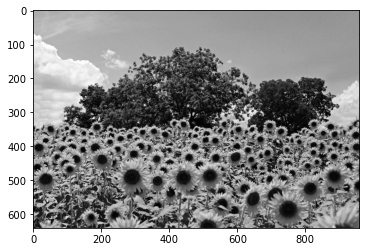

In [7]:
img = plt.imread('image3.png')
R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
img = 0.2989 * R + 0.5870 * G + 0.1140 * B
plt.imshow(img, cmap='gray')
plt.show()

In [8]:
sigmas = []
k = np.power(2, 0.33)
sigma = 1.0
for i  in range(11):
    sigmas.append(sigma*k**i)

==================== Calculating Local Maxima ====================
==================== Plotting ====================


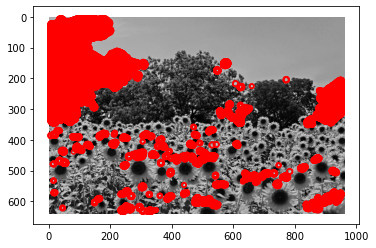

In [11]:
# It takes too much time, think it's the optimal parameters
detected_img = trackScale(img, sigmas=sigmas, size=15, threshold=0.25)